In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

style.use('seaborn')

import plotly
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['figure.figsize']= 14,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot
import folium


In [14]:
pyo.init_notebook_mode(connected  = True)
cf.go_offline()

In [15]:
df = pd.read_csv(r'C:\Users\ashut\OneDrive\Desktop\Data science doc\covid-19-india-data-master\covid-19-india-data-master\state_level_latest.csv')
df.drop(df.index[0], inplace = True)
df.drop('Last_Updated_Time', axis = 1, inplace = True)
df.drop(['Delta_Confirmed', 'Delta_Recovered', 'Delta_Deaths', 'State_Notes'], axis = 1, inplace = True )
df.style.background_gradient(cmap = 'Reds')


,State,Confirmed,Recovered,Deaths,Active,Migrated_Other,State_code
1,Maharashtra,479779,316375,16792,146305,307,MH
2,Tamil Nadu,279144,221087,4571,53486,0,TN
3,Delhi,141531,127124,4059,10348,0,DL
4,Karnataka,158254,80281,2897,75067,9,KA
5,Andhra Pradesh,196789,112870,1753,82166,0,AP
6,Uttar Pradesh,108974,63402,1918,43654,0,UP
7,Gujarat,67811,50524,2579,14708,0,GJ
8,West Bengal,86754,61023,1902,23829,0,WB
9,Telangana,73050,52103,589,20358,0,TG
10,Rajasthan,48996,35131,757,13108,0,RJ


In [16]:
Total_case = df.groupby('State')['Confirmed'].sum().sort_values(ascending = False).to_frame()
Total_case

,Confirmed
State,
Maharashtra,479779
Tamil Nadu,279144
Andhra Pradesh,196789
Karnataka,158254
Delhi,141531
Uttar Pradesh,108974
West Bengal,86754
Telangana,73050
Bihar,68148


In [17]:
Total_case.style.background_gradient(cmap = 'Reds')

,Confirmed
State,
Maharashtra,479779
Tamil Nadu,279144
Andhra Pradesh,196789
Karnataka,158254
Delhi,141531
Uttar Pradesh,108974
West Bengal,86754
Telangana,73050
Bihar,68148


In [18]:
###------------ Graphical Representation

<AxesSubplot:xlabel='State'>

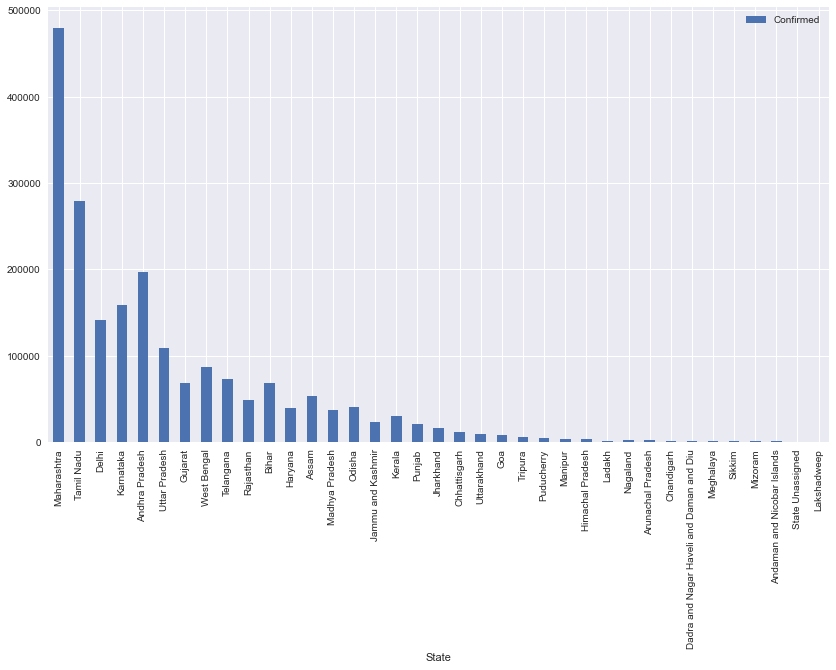

In [19]:
#------- Pandas inbuilt plot system

df.plot(kind = 'bar', x = 'State', y  = 'Confirmed')

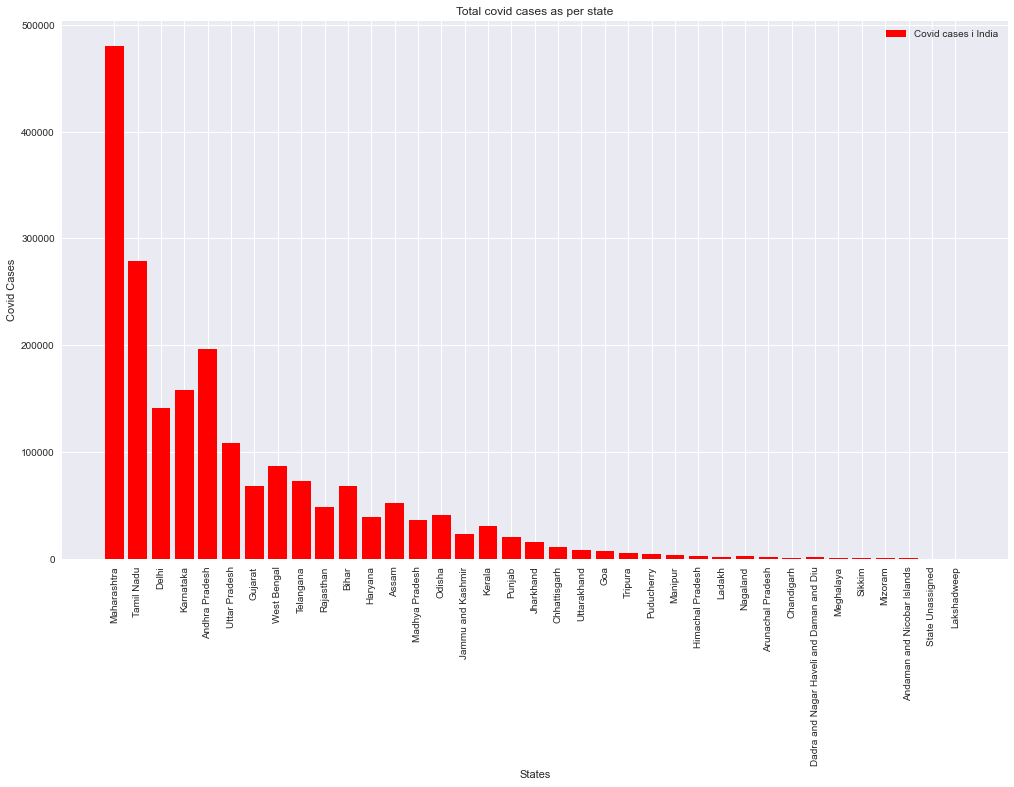

In [31]:
#----- Plot using matplotlib
plt.bar(df['State'], df['Confirmed'], color = 'Red', label = 'Covid cases i India')
plt.tight_layout()
plt.xlabel('States')
plt.ylabel('Covid Cases')
plt.title('Total covid cases as per state')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [21]:
#---- Plot using Plotly

df.iplot(kind = 'bar', x = 'State', y = 'Confirmed')

In [22]:
px.bar(df, x = 'State', y = 'Confirmed')

In [23]:
#--------------------Scatter Plot

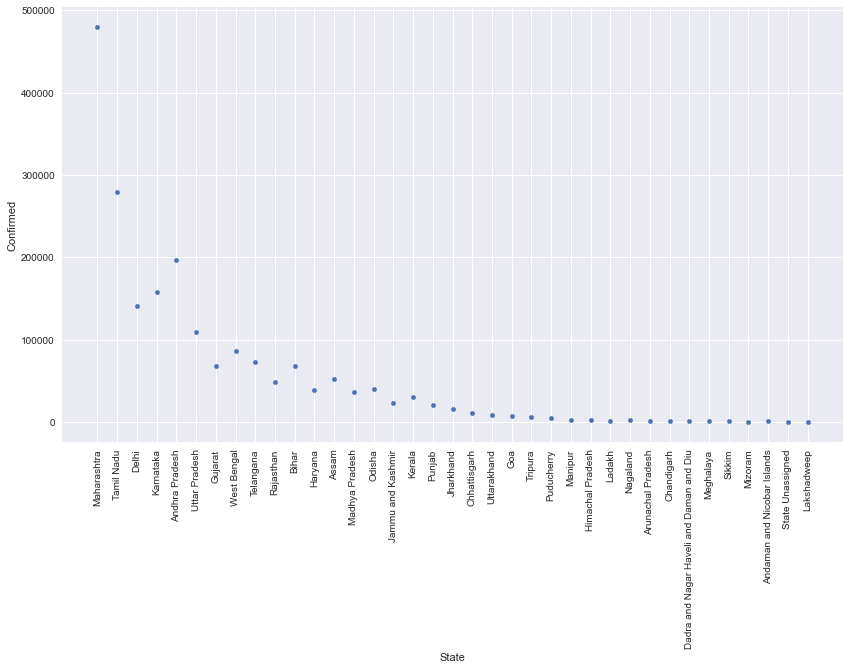

In [33]:
#------ Scatter plot using pandas

df.plot(kind = 'scatter', x = 'State', y = 'Confirmed')
plt.xticks(rotation=90)
plt.show()

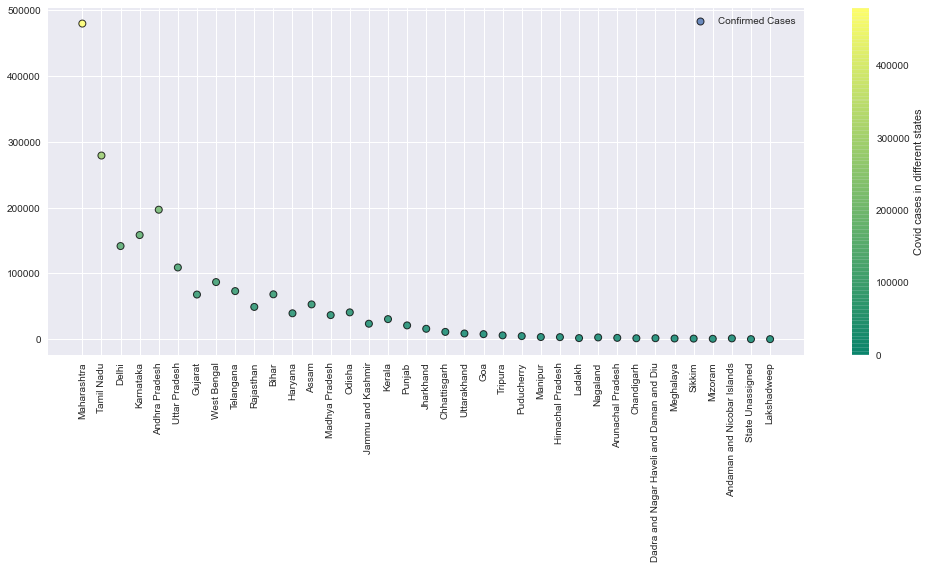

In [34]:
#------------- Scatterplot using matplotlib

plt.scatter(df['State'], df['Confirmed'], label = 'Confirmed Cases', linestyle = 'solid', c = df['Confirmed'], cmap = 'summer', edgecolor = 'black', linewidth = 1, alpha = 0.80)
cbar = plt.colorbar()
cbar.set_label('Covid cases in different states')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

In [26]:
#---------- scatterplot using plotly
df.iplot(kind = 'scatter', x = 'State', y = 'Confirmed', title = 'Covid cases in India', xTitle = 'States', yTitle = 'Confirmed Cases', mode = 'markers+lines')

In [27]:
#----------- Scatter plot using plotly express

px.scatter(df, x = 'State', y = 'Confirmed', title = 'Covid cases in India')

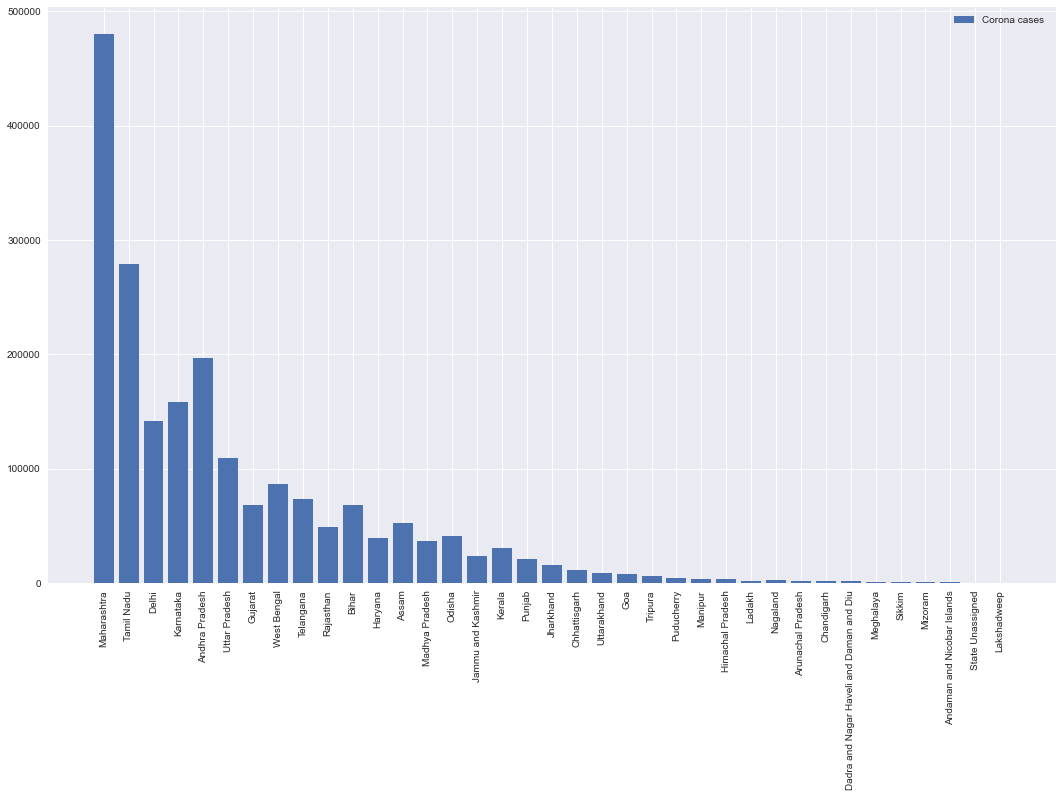

In [36]:
#------- matplotlib through object

fig = plt.figure()
axs = fig.add_axes([0,0,1,1])
axs.bar(df['State'], df['Confirmed'], label = 'Corona cases ')
axs.legend()
plt.xticks(rotation=90)
plt.show()

In [29]:
#------- plotly through object

fig = go.Figure()
fig.add_trace(go.Bar(x = df['State'], y= df['Confirmed']))
fig.update_layout(title = 'Total Covid cases in India', xaxis = dict(title = 'State'), yaxis = dict(title='Confirmed Cases'))

In [37]:
df1 = pd.read_csv(r'C:\Users\ashut\OneDrive\Desktop\Data science doc\covid-19-india-data-master\covid-19-india-data-master\complete.csv')
df1

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050.0,589,52103.0,2092,0,1289
4688,2020-08-06,Tripura,23.9408,91.9882,5725.0,31,3793.0,97,0,68
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388.0,1857,60558.0,4078,0,3287
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254.0,98,5233.0,246,0,386


In [39]:
df2 = pd.read_csv(r'C:\Users\ashut\OneDrive\Desktop\Data science doc\covid-19-india-data-master\covid-19-india-data-master\landl.csv')
df2.drop(['Total Confirmed cases', 'Cured/Discharged/Migrated', 'New cases', 'New deaths', 'New recovered'], axis = 1, inplace = True)


df2.columns = ['State', 'Latitude', 'Longitude']
df2




,State,Latitude,Longitude
0,Maharashtra,11.667026,92.735983
1,Tamil Nadu,14.750429,78.570026
2,Delhi,27.100399,93.616601
3,Karnataka,26.749981,94.216667
4,Andhra Pradesh,25.785414,87.479973
5,Uttar Pradesh,30.719997,76.780006
6,Gujarat,22.090420,82.159987
7,West Bengal,20.266578,73.016618
8,Telangana,28.669993,77.230004
9,Rajasthan,15.491997,73.818001


In [40]:
df_full = pd.merge(df2, df, on ='State' )
df_full

,State,Latitude,Longitude,Confirmed,Recovered,Deaths,Active,Migrated_Other,State_code
0,Maharashtra,11.667026,92.735983,479779,316375,16792,146305,307,MH
1,Tamil Nadu,14.750429,78.570026,279144,221087,4571,53486,0,TN
2,Delhi,27.100399,93.616601,141531,127124,4059,10348,0,DL
3,Karnataka,26.749981,94.216667,158254,80281,2897,75067,9,KA
4,Andhra Pradesh,25.785414,87.479973,196789,112870,1753,82166,0,AP
5,Uttar Pradesh,30.719997,76.780006,108974,63402,1918,43654,0,UP
6,Gujarat,22.090420,82.159987,67811,50524,2579,14708,0,GJ
7,West Bengal,20.266578,73.016618,86754,61023,1902,23829,0,WB
8,West Bengal,22.580390,88.329947,86754,61023,1902,23829,0,WB
9,Telangana,28.669993,77.230004,73050,52103,589,20358,0,TG


In [41]:
map = folium.Map(location = [20, 70], zoom_start = 4, tiles = 'Stamenterrain')
for lat, log, cases, state in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State']):
    folium.CircleMarker([lat, log], radius =20, popup = ('<strong>State</strong>: '+str(state).capitalize()+'<br>''<strong>Total Case</strong>: '+str(cases)+'<br>'), color = 'red', fill_color= 'red', fill_opacity = 0.3).add_to(map)
    
    
map

In [42]:
India = pd.read_excel(r'C:\Users\ashut\OneDrive\Desktop\Data science doc\covid-19-india-data-master\country.xlsx', sheet_name = 'india' )

Afganistan = pd.read_excel(r'C:\Users\ashut\OneDrive\Desktop\Data science doc\covid-19-india-data-master\country.xlsx', parse_dates = True, sheet_name = 'Afganistan' )

china = pd.read_excel(r'C:\Users\ashut\OneDrive\Desktop\Data science doc\covid-19-india-data-master\country.xlsx', parse_dates = True, sheet_name = 'china' )

France = pd.read_excel(r'C:\Users\ashut\OneDrive\Desktop\Data science doc\covid-19-india-data-master\country.xlsx', parse_dates = True, sheet_name = 'France' )


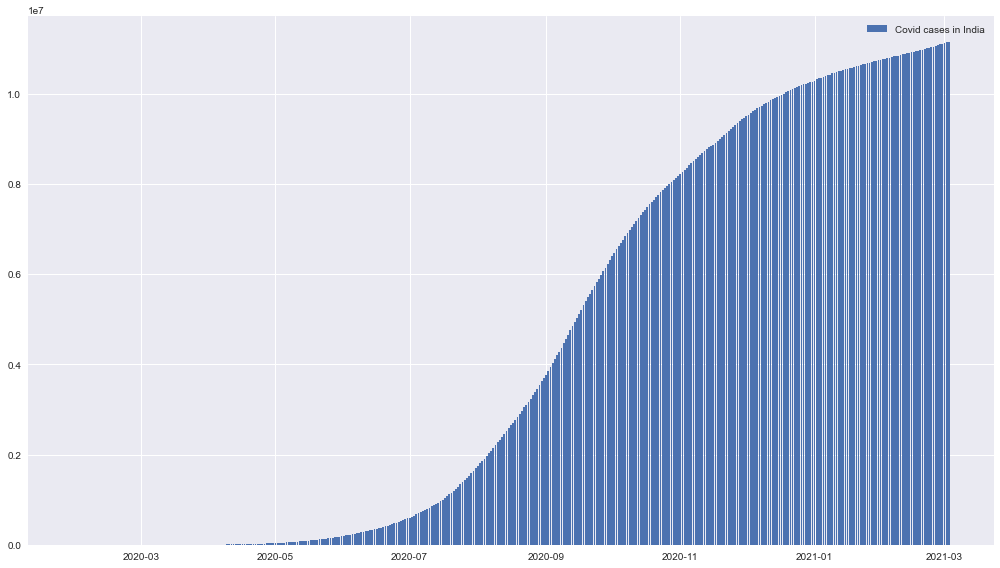

In [43]:

fig, axs1 = plt.subplots() 

axs1.bar(India['date'], India['total_cases'], label = 'Covid cases in India', )
axs1.legend()
plt.tight_layout()


fig = px.bar(India, x= 'date', y= 'total_cases', color = 'total_cases')
fig.show()

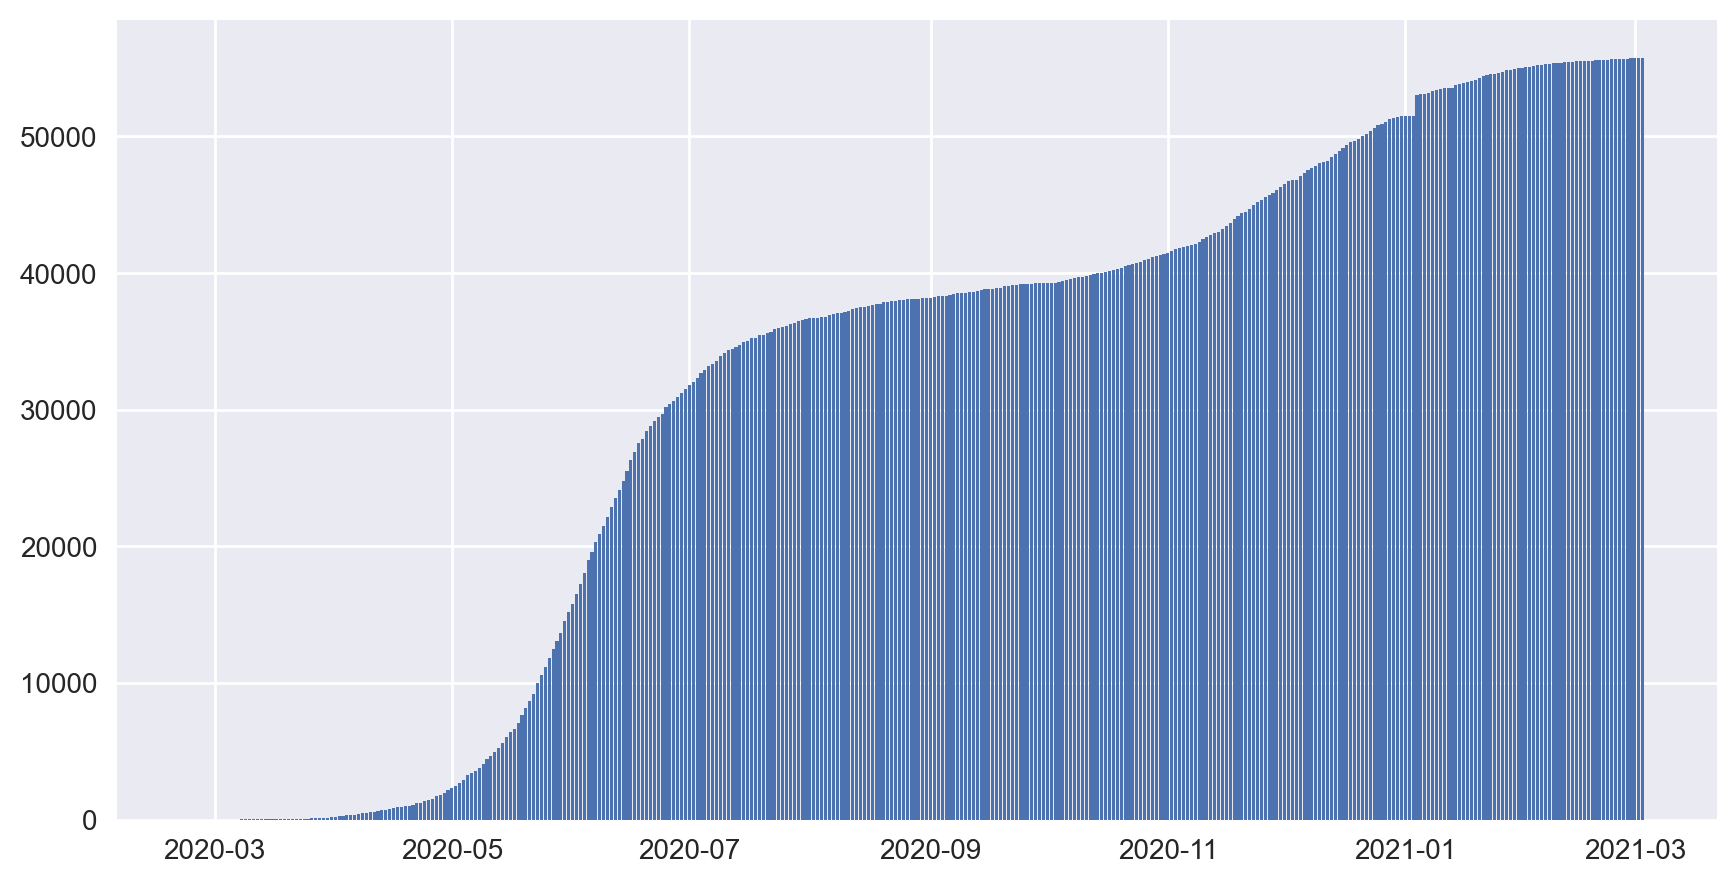

In [44]:
fig = plt.figure(figsize = (10,5), dpi = 200)
axs = fig.add_axes([0.1,0.1,0.8,0.8])
axs.bar(Afganistan['date'], Afganistan['total_cases'])



fig = px.bar(Afganistan, x = 'date', y = 'total_cases', color = 'total_cases')
fig.show()

In [45]:
Afganistan.iplot(kind = 'bar', x = 'date', y = 'total_cases')

In [46]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = Afganistan['date'], y = Afganistan['total_cases'], mode = 'lines+markers'))

<BarContainer object of 405 artists>

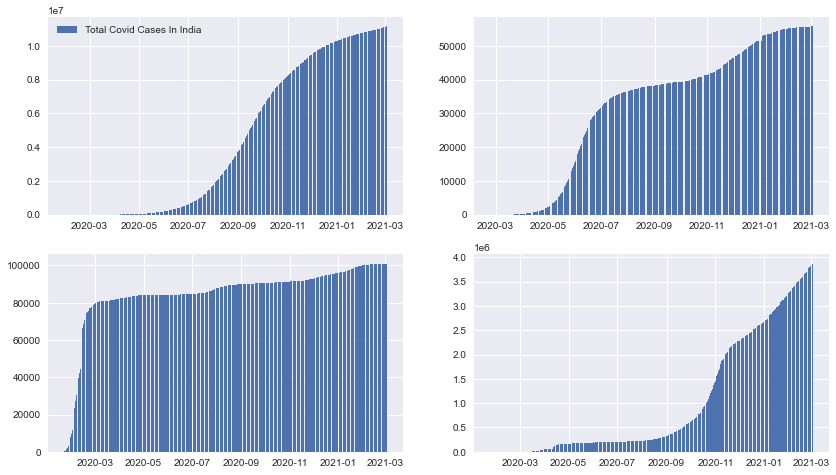

In [47]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.bar(India['date'], India['total_cases'], label = 'Total Covid Cases In India')
ax1.set_xlabel('')
ax1.legend()

ax2.bar(Afganistan['date'], Afganistan['total_cases'], label = 'Total Covid Cases In Afganistan')

ax3.bar(china['date'], china['total_cases'], label = 'Total Covid Cases In China')

ax4.bar(France['date'], France['total_cases'], label = 'Total Covid Cases In France')





In [48]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 2, cols = 2, specs = [[{'secondary_y': True}, {'secondary_y': True}],
                    [{'secondary_y': True},{'secondary_y': True}]] ,
                    subplot_titles=('India', 'Afganistan', 'China', 'France'))

fig.add_trace(go.Bar(x = India['date'], y = India['total_cases'], marker = dict(color = India['total_cases'], coloraxis = 'coloraxis')), 1,1)
fig.add_trace(go.Bar(x = Afganistan['date'], y = Afganistan['total_cases'], marker = dict(color = Afganistan['total_cases'], coloraxis = 'coloraxis')), 1,2)

fig.add_trace(go.Bar(x = china['date'], y = china['total_cases'], marker = dict(color = china['total_cases'], coloraxis = 'coloraxis')), 2,1)
fig.add_trace(go.Bar(x = France['date'], y = France['total_cases'], marker = dict(color = France['total_cases'], coloraxis = 'coloraxis')), 2,2)

fig.update_layout(coloraxis = dict(colorscale = 'Bluered_r'), showlegend = False, title_text = 'Total covid cases in 4 countries')
fig.update_layout(plot_bgcolor = 'rgb(230,230,230)')

In [50]:
new_data = pd.read_csv(r'C:\Users\ashut\OneDrive\Desktop\Data science doc\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\covid_19_data.csv', parse_dates = ['Last Update'])

new_data.rename(columns = {'ObservationDate':'Date', 'Country/Region':'Country'}, inplace = True)
new_data

Confirmed = new_data.groupby('Date').sum()['Confirmed'].reset_index()
Deaths = new_data.groupby('Date').sum()['Deaths'].reset_index()
Recovered = new_data.groupby('Date').sum()['Recovered'].reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x= Confirmed['Date'], y = Confirmed['Confirmed'], mode = 'lines+markers', name = 'Confirmed Cases', line = dict(color = 'blue', width = 2)))
fig.add_trace(go.Scatter(x= Deaths['Date'], y = Deaths['Deaths'], mode = 'lines+markers', name = 'Total Deaths', line = dict(color = 'red', width = 2)))
fig.add_trace(go.Scatter(x= Recovered['Date'], y = Recovered['Recovered'], mode = 'lines+markers', name = 'Total Recovered', line = dict(color = 'green', width = 2)))


In [51]:
df_confirmed = pd.read_csv(r'C:\Users\ashut\OneDrive\Desktop\Data science doc\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\time_series_covid_19_confirmed.csv')

df_confirmed.rename(columns = {'Country/Region':'Country', }, inplace = True)

df_confirmed

latandlog = pd.merge(df_confirmed, new_data, on =['Country','Province/State'] ) 
latandlog


,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,SNo,Date,Last Update,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,37,01/22/2020,2020-01-22 17:00:00,2.0,0.0,0.0
1,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,75,01/23/2020,2020-01-23 17:00:00,3.0,0.0,0.0
2,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,121,01/24/2020,2020-01-24 17:00:00,5.0,0.0,0.0
3,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,162,01/25/2020,2020-01-25 17:00:00,7.0,0.0,0.0
4,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,208,01/26/2020,2020-01-26 16:00:00,8.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,NaN,occupied Palestinian territory,31.9522,35.2332,0,0,0,0,0,0,...,0,0,0,0,4593,03/10/2020,2020-03-10 19:13:21,25.0,0.0,0.0
3286,NaN,occupied Palestinian territory,31.9522,35.2332,0,0,0,0,0,0,...,0,0,0,0,4935,03/11/2020,2020-03-11 20:53:02,0.0,0.0,0.0
3287,NaN,occupied Palestinian territory,31.9522,35.2332,0,0,0,0,0,0,...,0,0,0,0,5153,03/12/2020,2020-03-11 20:53:02,0.0,0.0,0.0
3288,NaN,occupied Palestinian territory,31.9522,35.2332,0,0,0,0,0,0,...,0,0,0,0,5632,03/14/2020,2020-03-11 20:53:02,0.0,0.0,0.0


In [52]:
fig = px.density_mapbox(latandlog, lat = 'Lat', lon = 'Long', hover_name = 'Country', hover_data = ['Confirmed', 'Deaths', 'Recovered'],animation_frame = 'Date',color_continuous_scale = 'Portland', radius = 7, zoom = 0, height = 700   )
fig.update_layout(title = 'World Wide Covid19 Cases ')
fig.update_layout(mapbox_style = 'open-street-map', mapbox_center_lon = 0)
fig.update_layout(margin = {'r':0, 't':0, 'l':0, 'b':0})